In [0]:
spark

SparkSession - hive 
 
 
 SparkContext 

 Spark UI 

 
 Version 
 v3.3.2 
 Master 
 local[8] 
 AppName 
 Databricks Shell

In [0]:
from pyspark.sql.types import *
from pyspark.sql.functions import *
from pyspark.sql.window import Window


from pyspark.sql import SparkSession 
#create session
spark= SparkSession.builder.appName("IPL DATA ANALYSIS").getOrCreate()

In [0]:
ball_by_ball_df = spark.read.format("csv").option("header","true").option("inferSchema","true").load("s3://ipl-dataanalaysis-databricks/ball_by_ball.csv")

In [0]:
ball_by_ball_df.show(5)

+--------+-------+-------+----------+------------+------------+------------------------+----------+-----------+----------+-----+-------+----+-------+-------+-------------+--------------+------+------+-------+-----+------------+-------+-----------------+----------+----------------+-------------+----------+------+-------+-----------+------+----------+--------+----------------+---------+-------------------+-------------+----------------+----------+---------------+---------+------------------+--------------+--------------+------------+-------------+-----------+
|match_id|over_id|ball_id|innings_no|team_batting|team_bowling|striker_batting_position|extra_type|runs_scored|extra_runs|wides|legbyes|byes|noballs|penalty|bowler_extras|      out_type|caught|bowled|run_out|  lbw|retired_hurt|stumped|caught_and_bowled|hit_wicket|obstructingfeild|bowler_wicket|match_date|season|striker|non_striker|bowler|player_out|fielders|striker_match_sk|strikersk|nonstriker_match_sk|nonstriker_sk|fielder_match_s

In [0]:
from pyspark.sql.types import *
from pyspark.sql.functions import *


In [0]:
ball_by_ball_schema = StructType([
    StructField("match_id", IntegerType(), nullable=True),
    StructField("over_id", IntegerType(), nullable=True),
    StructField("ball_id", IntegerType(), nullable=True),
    StructField("innings_no", IntegerType(), nullable=True),
    StructField("team_batting", StringType(), nullable=True),
    StructField("team_bowling", StringType(), nullable=True),
    StructField("striker_batting_position", IntegerType(), nullable=True),
    StructField("extra_type", StringType(), nullable=True),
    StructField("runs_scored", IntegerType(), nullable=True),
    StructField("extra_runs", IntegerType(), nullable=True),
    StructField("wides", IntegerType(), nullable=True),
    StructField("legbyes", IntegerType(), nullable=True),
    StructField("byes", IntegerType(), nullable=True),
    StructField("noballs", IntegerType(), nullable=True),
    StructField("penalty", IntegerType(), nullable=True),
    StructField("bowler_extras", IntegerType(), nullable=True),
    StructField("out_type", StringType(), nullable=True),
    StructField("caught", BooleanType(), nullable=True),
    StructField("bowled", BooleanType(), nullable=True),
    StructField("run_out", BooleanType(), nullable=True),
    StructField("lbw", BooleanType(), nullable=True),
    StructField("retired_hurt", BooleanType(), nullable=True),
    StructField("stumped", BooleanType(), nullable=True),
    StructField("caught_and_bowled", BooleanType(), nullable=True),
    StructField("hit_wicket", BooleanType(), nullable=True),
    StructField("obstructingfeild", BooleanType(), nullable=True),
    StructField("bowler_wicket", BooleanType(), nullable=True),
    StructField("match_date", DateType(), nullable=True),
    StructField("season", IntegerType(), nullable=True),
    StructField("striker", IntegerType(), nullable=True),
    StructField("non_striker", IntegerType(), nullable=True),
    StructField("bowler", IntegerType(), nullable=True),
    StructField("player_out", IntegerType(), nullable=True),
    StructField("fielders", IntegerType(), nullable=True),
    StructField("striker_match_sk", IntegerType(), nullable=True),
    StructField("strikersk", IntegerType(), nullable=True),
    StructField("nonstriker_match_sk", IntegerType(), nullable=True),
    StructField("nonstriker_sk", IntegerType(), nullable=True),
    StructField("fielder_match_sk", IntegerType(), nullable=True),
    StructField("fielder_sk", IntegerType(), nullable=True),
    StructField("bowler_match_sk", IntegerType(), nullable=True),
    StructField("bowler_sk", IntegerType(), nullable=True),
    StructField("playerout_match_sk", IntegerType(), nullable=True),
    StructField("battingteam_sk", IntegerType(), nullable=True),
    StructField("bowlingteam_sk", IntegerType(), nullable=True),
    StructField("keeper_catch", BooleanType(), nullable=True),
    StructField("player_out_sk", IntegerType(), nullable=True),
    StructField("matchdatesk", DateType(), nullable=True)
])

In [0]:
ball_by_ball_df = spark.read.format("csv").schema(ball_by_ball_schema).option("header","true").load("s3://ipl-dataanalaysis-databricks/ball_by_ball.csv")

In [0]:
team_schema = StructType([
    StructField("team_sk", IntegerType(), nullable=True),
    StructField("team_id", IntegerType(), nullable=True),
    StructField("team_name", StringType(), nullable=True)
])

team_df = spark.read.format("csv").schema(team_schema).option("header","true").load("s3://ipl-dataanalaysis-databricks/team.csv")

In [0]:
player_match_schema = StructType([
    StructField("player_match_sk", IntegerType(), nullable=True),
    StructField("playermatch_key", DecimalType(10, 0), nullable=True),
    StructField("match_id", IntegerType(), nullable=True),
    StructField("player_id", IntegerType(), nullable=True),
    StructField("player_name", StringType(), nullable=True),
    StructField("dob", DateType(), nullable=True),
    StructField("batting_hand", StringType(), nullable=True),
    StructField("bowling_skill", StringType(), nullable=True),
    StructField("country_name", StringType(), nullable=True),
    StructField("role_desc", StringType(), nullable=True),
    StructField("player_team", StringType(), nullable=True),
    StructField("opposit_team", StringType(), nullable=True),
    StructField("season_year", IntegerType(), nullable=True),
    StructField("is_manofthematch", BooleanType(), nullable=True),
    StructField("age_as_on_match", IntegerType(), nullable=True),
    StructField("isplayers_team_won", BooleanType(), nullable=True),
    StructField("batting_status", StringType(), nullable=True),
    StructField("bowling_status", StringType(), nullable=True),
    StructField("player_captain", StringType(), nullable=True),
    StructField("opposit_captain", StringType(), nullable=True),
    StructField("player_keeper", StringType(), nullable=True),
    StructField("opposit_keeper", StringType(), nullable=True)
])

player_match_df= spark.read.format("csv").schema(player_match_schema).option("header","true").load("s3://ipl-dataanalaysis-databricks/player_match.csv")

In [0]:
player_match_df.toPandas().head()

/databricks/spark/python/pyspark/sql/pandas/utils.py:124: UserWarning: The conversion of DecimalType columns is inefficient and may take a long time. Column names: [playermatch_key] If those columns are not necessary, you may consider dropping them or converting to primitive types before the conversion.
  warnings.warn(


,player_match_sk,playermatch_key,match_id,player_id,player_name,dob,batting_hand,bowling_skill,country_name,role_desc,...,season_year,is_manofthematch,age_as_on_match,isplayers_team_won,batting_status,bowling_status,player_captain,opposit_captain,player_keeper,opposit_keeper
0,-1,-1,-1,-1,N/A,None,None,None,None,None,...,NaN,None,NaN,None,None,None,None,None,None,None
1,12694,None,335987,6,R Dravid,1973-01-11,Right-hand bat,Right-arm offbreak,India,Captain,...,2008.0,False,35.0,False,None,None,R Dravid,SC Ganguly,MV Boucher,WP Saha
2,12695,None,335987,7,W Jaffer,1978-02-16,Right-hand bat,Right-arm offbreak,India,Player,...,2008.0,False,30.0,False,None,None,R Dravid,SC Ganguly,MV Boucher,WP Saha
3,12696,None,335987,8,V Kohli,1988-11-05,Right-hand bat,Right-arm medium,India,Player,...,2008.0,False,20.0,False,None,None,R Dravid,SC Ganguly,MV Boucher,WP Saha
4,12697,None,335987,9,JH Kallis,1975-10-16,Right-hand bat,Right-arm fast-medium,South Africa,Player,...,2008.0,False,33.0,False,None,None,R Dravid,SC Ganguly,MV Boucher,WP Saha


In [0]:
player_schema = StructType([
    StructField("player_sk", IntegerType(), nullable=True),
    StructField("player_id", IntegerType(), nullable=True),
    StructField("player_name", StringType(), nullable=True),
    StructField("dob", DateType(), nullable=True),
    StructField("batting_hand", StringType(), nullable=True),
    StructField("bowling_skill", StringType(), nullable=True),
    StructField("country_name", StringType(), nullable=True)
])
player_df =spark.read.format("csv").schema(player_schema).option("header","true").load("s3://ipl-dataanalaysis-databricks/player.csv")

In [0]:
match_schema = StructType([
    StructField("match_sk", IntegerType(), nullable=True),
    StructField("match_id", IntegerType(), nullable=True),
    StructField("team1", StringType(), nullable=True),
    StructField("team2", StringType(), nullable=True),
    StructField("match_date", DateType(), nullable=True),
    StructField("season_year", IntegerType(), nullable=True),
    StructField("venue_name", StringType(), nullable=True),
    StructField("city_name", StringType(), nullable=True),
    StructField("country_name", StringType(), nullable=True),
    StructField("toss_winner", StringType(), nullable=True),
    StructField("match_winner", StringType(), nullable=True),
    StructField("toss_name", StringType(), nullable=True),
    StructField("win_type", StringType(), nullable=True),
    StructField("outcome_type", StringType(), nullable=True),
    StructField("manofmach", StringType(), nullable=True),
    StructField("win_margin", IntegerType(), nullable=True),
    StructField("country_id", IntegerType(), nullable=True)
])

match_df = spark.read.format("csv").schema(match_schema).option("header","true").load("s3://ipl-dataanalaysis-databricks/match.csv")

In [0]:
#filtering to include only valid deliveries(excluding the noballs and wides)
ball_by_ball_df = ball_by_ball_df.filter((col('wides')==0) & (col('noballs')==0))

In [0]:
ball_by_ball_df.toPandas()['wides'].unique

Out[14]: <bound method Series.unique of 0         0
1         0
2         0
3         0
4         0
         ..
145253    0
145254    0
145255    0
145256    0
145257    0
Name: wides, Length: 145258, dtype: int32>

In [0]:
ball_by_ball_df.columns

Out[15]: ['match_id',
 'over_id',
 'ball_id',
 'innings_no',
 'team_batting',
 'team_bowling',
 'striker_batting_position',
 'extra_type',
 'runs_scored',
 'extra_runs',
 'wides',
 'legbyes',
 'byes',
 'noballs',
 'penalty',
 'bowler_extras',
 'out_type',
 'caught',
 'bowled',
 'run_out',
 'lbw',
 'retired_hurt',
 'stumped',
 'caught_and_bowled',
 'hit_wicket',
 'obstructingfeild',
 'bowler_wicket',
 'match_date',
 'season',
 'striker',
 'non_striker',
 'bowler',
 'player_out',
 'fielders',
 'striker_match_sk',
 'strikersk',
 'nonstriker_match_sk',
 'nonstriker_sk',
 'fielder_match_sk',
 'fielder_sk',
 'bowler_match_sk',
 'bowler_sk',
 'playerout_match_sk',
 'battingteam_sk',
 'bowlingteam_sk',
 'keeper_catch',
 'player_out_sk',
 'matchdatesk']

In [0]:
ball_by_ball_df.toPandas()

,match_id,over_id,ball_id,innings_no,team_batting,team_bowling,striker_batting_position,extra_type,runs_scored,extra_runs,...,fielder_match_sk,fielder_sk,bowler_match_sk,bowler_sk,playerout_match_sk,battingteam_sk,bowlingteam_sk,keeper_catch,player_out_sk,matchdatesk
0,598028,15,6,1,5,2,6.0,No Extras,4,0,...,-1,-1,20343,82,-1,4,1,False,0,2013-04-20
1,598028,14,1,1,5,2,5.0,No Extras,1,0,...,-1,-1,20348,345,-1,4,1,False,0,2013-04-20
2,598028,14,2,1,5,2,3.0,No Extras,1,0,...,-1,-1,20348,345,-1,4,1,False,0,2013-04-20
3,598028,14,3,1,5,2,5.0,No Extras,1,0,...,-1,-1,20348,345,-1,4,1,False,0,2013-04-20
4,598028,14,4,1,5,2,3.0,No Extras,0,0,...,-1,-1,20348,345,-1,4,1,False,0,2013-04-20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145253,598028,15,1,1,5,2,5.0,No Extras,1,0,...,-1,-1,20343,82,-1,4,1,False,0,2013-04-20
145254,598028,15,2,1,5,2,3.0,No Extras,2,0,...,-1,-1,20343,82,-1,4,1,False,0,2013-04-20
145255,598028,15,3,1,5,2,3.0,No Extras,4,0,...,-1,-1,20343,82,-1,4,1,False,0,2013-04-20
145256,598028,15,4,1,5,2,3.0,No Extras,0,0,...,20349,348,20343,82,20328,4,1,False,0,2013-04-20


In [0]:
#aggregation: calculate the total and average runs scored in each match and innings

match_totl_avg = ball_by_ball_df.groupBy('match_id','innings_no').agg(
    sum('runs_scored').alias('Total_runs'), 
    avg('runs_scored').alias('average_runs'),
    countDistinct('over_id').alias('overs_played')
    ).orderBy('match_id','innings_no')

In [0]:
match_totl_avg.toPandas()

,match_id,innings_no,Total_runs,average_runs,overs_played
0,335987,1,205,1.708333,20
1,335987,2,63,0.692308,16
2,335988,1,230,1.916667,20
3,335988,2,196,1.633333,20
4,335989,1,118,0.983333,20
...,...,...,...,...,...
1279,1082648,2,44,1.375000,6
1280,1082649,1,100,0.884956,19
1281,1082649,2,103,1.183908,15
1282,1082650,1,121,1.008333,20


In [0]:
#window function: calculate total of runs in each match for each over
# Define WindowSpec partitioned by over_id and ordered by match
windowSpec = Window.partitionBy("match_id","innings_no").orderBy(col("over_id").desc())

Runs_in_over = ball_by_ball_df.withColumn('total_runs_in _over', sum('runs_scored').over(windowSpec))




In [0]:
Runs_in_over.toPandas()

,match_id,over_id,ball_id,innings_no,team_batting,team_bowling,striker_batting_position,extra_type,runs_scored,extra_runs,...,fielder_sk,bowler_match_sk,bowler_sk,playerout_match_sk,battingteam_sk,bowlingteam_sk,keeper_catch,player_out_sk,matchdatesk,total_runs_in _over
0,335990,20,1,2,2,7,6.0,No Extras,1,0,...,-1,12770,79,-1,1,6,False,0,2008-04-20,2
1,335990,20,3,2,2,7,7.0,No Extras,0,0,...,-1,12770,79,-1,1,6,False,0,2008-04-20,2
2,335990,20,4,2,2,7,7.0,No Extras,0,0,...,-1,12770,79,-1,1,6,False,0,2008-04-20,2
3,335990,20,5,2,2,7,7.0,No Extras,1,0,...,-1,12770,79,-1,1,6,False,0,2008-04-20,2
4,335990,19,1,2,2,7,4.0,No Extras,1,0,...,-1,12767,49,-1,1,6,False,0,2008-04-20,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145253,1082649,1,2,2,Mumbai Indians,Kolkata Knight Riders,NaN,No Extras,2,0,...,-1,26651,231,-1,6,0,False,-1,2017-05-19,103
145254,1082649,1,3,2,Mumbai Indians,Kolkata Knight Riders,NaN,No Extras,1,0,...,-1,26651,231,-1,6,0,False,-1,2017-05-19,103
145255,1082649,1,4,2,Mumbai Indians,Kolkata Knight Riders,NaN,No Extras,0,0,...,-1,26651,231,-1,6,0,False,-1,2017-05-19,103
145256,1082649,1,5,2,Mumbai Indians,Kolkata Knight Riders,NaN,Legbyes,0,4,...,-1,26651,231,-1,6,0,False,-1,2017-05-19,103


In [0]:
#window function: calculate total of runs in each match for each over
# Define WindowSpec partitioned by over_id and ordered by match
windowSpec = Window.partitionBy("match_id","innings_no").orderBy(col("over_id").desc())

Runs_in_over = ball_by_ball_df.withColumn('total_runs_in _over', sum('runs_scored').over(windowSpec))

In [0]:
Runs_in_over.toPandas()

,match_id,over_id,ball_id,innings_no,team_batting,team_bowling,striker_batting_position,extra_type,runs_scored,extra_runs,...,fielder_sk,bowler_match_sk,bowler_sk,playerout_match_sk,battingteam_sk,bowlingteam_sk,keeper_catch,player_out_sk,matchdatesk,total_runs_in _over
0,335990,20,1,2,2,7,6.0,No Extras,1,0,...,-1,12770,79,-1,1,6,False,0,2008-04-20,2
1,335990,20,3,2,2,7,7.0,No Extras,0,0,...,-1,12770,79,-1,1,6,False,0,2008-04-20,2
2,335990,20,4,2,2,7,7.0,No Extras,0,0,...,-1,12770,79,-1,1,6,False,0,2008-04-20,2
3,335990,20,5,2,2,7,7.0,No Extras,1,0,...,-1,12770,79,-1,1,6,False,0,2008-04-20,2
4,335990,19,1,2,2,7,4.0,No Extras,1,0,...,-1,12767,49,-1,1,6,False,0,2008-04-20,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145253,1082649,1,2,2,Mumbai Indians,Kolkata Knight Riders,NaN,No Extras,2,0,...,-1,26651,231,-1,6,0,False,-1,2017-05-19,103
145254,1082649,1,3,2,Mumbai Indians,Kolkata Knight Riders,NaN,No Extras,1,0,...,-1,26651,231,-1,6,0,False,-1,2017-05-19,103
145255,1082649,1,4,2,Mumbai Indians,Kolkata Knight Riders,NaN,No Extras,0,0,...,-1,26651,231,-1,6,0,False,-1,2017-05-19,103
145256,1082649,1,5,2,Mumbai Indians,Kolkata Knight Riders,NaN,Legbyes,0,4,...,-1,26651,231,-1,6,0,False,-1,2017-05-19,103


In [0]:
#conditional column: Flag high impact balls(either a wicket or more than 6 runs including extras)

High_impact_balls =  ball_by_ball_df.withColumn(
    'High_impact_balls',
    when(((col('runs_scored')+col('extra_runs')) > 6) | (col('out_type') != 'Not Applicable'), True).otherwise(False)
)
High_impact_balls.toPandas()

,match_id,over_id,ball_id,innings_no,team_batting,team_bowling,striker_batting_position,extra_type,runs_scored,extra_runs,...,fielder_sk,bowler_match_sk,bowler_sk,playerout_match_sk,battingteam_sk,bowlingteam_sk,keeper_catch,player_out_sk,matchdatesk,High_impact_balls
0,598028,15,6,1,5,2,6.0,No Extras,4,0,...,-1,20343,82,-1,4,1,False,0,2013-04-20,False
1,598028,14,1,1,5,2,5.0,No Extras,1,0,...,-1,20348,345,-1,4,1,False,0,2013-04-20,False
2,598028,14,2,1,5,2,3.0,No Extras,1,0,...,-1,20348,345,-1,4,1,False,0,2013-04-20,False
3,598028,14,3,1,5,2,5.0,No Extras,1,0,...,-1,20348,345,-1,4,1,False,0,2013-04-20,False
4,598028,14,4,1,5,2,3.0,No Extras,0,0,...,-1,20348,345,-1,4,1,False,0,2013-04-20,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145253,598028,15,1,1,5,2,5.0,No Extras,1,0,...,-1,20343,82,-1,4,1,False,0,2013-04-20,False
145254,598028,15,2,1,5,2,3.0,No Extras,2,0,...,-1,20343,82,-1,4,1,False,0,2013-04-20,False
145255,598028,15,3,1,5,2,3.0,No Extras,4,0,...,-1,20343,82,-1,4,1,False,0,2013-04-20,False
145256,598028,15,4,1,5,2,3.0,No Extras,0,0,...,348,20343,82,20328,4,1,False,0,2013-04-20,True


In [0]:
from pyspark.sql.functions import year, month, dayofmonth, when

# Extracting year, month, and day from the match date for more detailed time-based analysis
match_df = match_df.withColumn("year", year("match_date"))
match_df = match_df.withColumn("month", month("match_date"))
match_df = match_df.withColumn("day", dayofmonth("match_date"))

# High margin win: categorizing win margins into 'high', 'medium', and 'low'
match_df = match_df.withColumn(
    "win_margin_category",
    when(col("win_margin") >= 100, "High")
    .when((col("win_margin") >= 50) & (col("win_margin") < 100), "Medium")
    .otherwise("Low")
)

# Analyze the impact of the toss: who wins the toss and the match
match_df = match_df.withColumn(
    "toss_match_winner",
    when(col("toss_winner") == col("match_winner"), "Yes").otherwise("No")
)

# Show the enhanced match DataFrame
match_df.show(2)



+--------+--------+--------------------+--------------------+----------+-----------+--------------------+----------+------------+--------------------+--------------------+---------+--------+------------+-----------+----------+----------+----+-----+---+-------------------+-----------------+
|match_sk|match_id|               team1|               team2|match_date|season_year|          venue_name| city_name|country_name|         toss_winner|        match_winner|toss_name|win_type|outcome_type|  manofmach|win_margin|country_id|year|month|day|win_margin_category|toss_match_winner|
+--------+--------+--------------------+--------------------+----------+-----------+--------------------+----------+------------+--------------------+--------------------+---------+--------+------------+-----------+----------+----------+----+-----+---+-------------------+-----------------+
|       0|  335987|Royal Challengers...|Kolkata Knight Ri...|2008-04-18|       2008|M Chinnaswamy Sta...| Bangalore|       Indi

In [0]:
ball_by_ball_df.columns

Out[25]: ['match_id',
 'over_id',
 'ball_id',
 'innings_no',
 'team_batting',
 'team_bowling',
 'striker_batting_position',
 'extra_type',
 'runs_scored',
 'extra_runs',
 'wides',
 'legbyes',
 'byes',
 'noballs',
 'penalty',
 'bowler_extras',
 'out_type',
 'caught',
 'bowled',
 'run_out',
 'lbw',
 'retired_hurt',
 'stumped',
 'caught_and_bowled',
 'hit_wicket',
 'obstructingfeild',
 'bowler_wicket',
 'match_date',
 'season',
 'striker',
 'non_striker',
 'bowler',
 'player_out',
 'fielders',
 'striker_match_sk',
 'strikersk',
 'nonstriker_match_sk',
 'nonstriker_sk',
 'fielder_match_sk',
 'fielder_sk',
 'bowler_match_sk',
 'bowler_sk',
 'playerout_match_sk',
 'battingteam_sk',
 'bowlingteam_sk',
 'keeper_catch',
 'player_out_sk',
 'matchdatesk']

In [0]:
from  pyspark.sql.functions import *

#Normalize and clean player names- removing the dummy or garbage values in player name
player_df = player_df.withColumn('player_name',lower(regexp_replace('player_name', '[^a-zA-Z0-9 ]','')))

#handling missing values in 'batting_hand' and  'bowling_skill' with a default 'unknown'
player_df= player_df.na.fill({'batting_hand':'unknown','bowling_skill':'unknown'})

# Categorize the player based on the batting hand
player_df = player_df.withColumn(
    'batting_style',
    when(col('batting_hand')== 'Left-hand bat','Left_handed').otherwise('Right_handed')
)

In [0]:
player_df.show(2)

+---------+---------+-----------+----------+--------------+----------------+------------+-------------+
|player_sk|player_id|player_name|       dob|  batting_hand|   bowling_skill|country_name|batting_style|
+---------+---------+-----------+----------+--------------+----------------+------------+-------------+
|        0|        1| sc ganguly|1972-07-08| Left-hand bat|Right-arm medium|       India|  Left_handed|
|        1|        2|bb mccullum|1981-09-27|Right-hand bat|Right-arm medium| New Zealand| Right_handed|
+---------+---------+-----------+----------+--------------+----------------+------------+-------------+
only showing top 2 rows



In [0]:
#add a 'veteran_status' column based on player age
# Add a 'veteran_status' column based on player age
player_match_df = player_match_df.withColumn(
    "veteran_status",
    when(col("age_as_on_match") >= 35, "Veteran").otherwise("Non-Veteran")
)


# Show the enriched DataFrame
player_match_df.show()



+---------------+---------------+--------+---------+---------------+----------+--------------+--------------------+------------+---------+--------------------+--------------------+-----------+----------------+---------------+------------------+--------------+--------------+--------------+---------------+-------------+--------------+--------------+
|player_match_sk|playermatch_key|match_id|player_id|    player_name|       dob|  batting_hand|       bowling_skill|country_name|role_desc|         player_team|        opposit_team|season_year|is_manofthematch|age_as_on_match|isplayers_team_won|batting_status|bowling_status|player_captain|opposit_captain|player_keeper|opposit_keeper|veteran_status|
+---------------+---------------+--------+---------+---------------+----------+--------------+--------------------+------------+---------+--------------------+--------------------+-----------+----------------+---------------+------------------+--------------+--------------+--------------+-----------

In [0]:
player_match_df.columns

Out[29]: ['player_match_sk',
 'playermatch_key',
 'match_id',
 'player_id',
 'player_name',
 'dob',
 'batting_hand',
 'bowling_skill',
 'country_name',
 'role_desc',
 'player_team',
 'opposit_team',
 'season_year',
 'is_manofthematch',
 'age_as_on_match',
 'isplayers_team_won',
 'batting_status',
 'bowling_status',
 'player_captain',
 'opposit_captain',
 'player_keeper',
 'opposit_keeper',
 'veteran_status']

In [0]:
player_match_df.describe


Out[30]: <bound method DataFrame.describe of DataFrame[player_match_sk: int, playermatch_key: decimal(10,0), match_id: int, player_id: int, player_name: string, dob: date, batting_hand: string, bowling_skill: string, country_name: string, role_desc: string, player_team: string, opposit_team: string, season_year: int, is_manofthematch: boolean, age_as_on_match: int, isplayers_team_won: boolean, batting_status: string, bowling_status: string, player_captain: string, opposit_captain: string, player_keeper: string, opposit_keeper: string, veteran_status: string]>

In [0]:
ball_by_ball_df.toPandas().head()

,match_id,over_id,ball_id,innings_no,team_batting,team_bowling,striker_batting_position,extra_type,runs_scored,extra_runs,...,fielder_match_sk,fielder_sk,bowler_match_sk,bowler_sk,playerout_match_sk,battingteam_sk,bowlingteam_sk,keeper_catch,player_out_sk,matchdatesk
0,598028,15,6,1,5,2,6.0,No Extras,4,0,...,-1,-1,20343,82,-1,4,1,False,0,2013-04-20
1,598028,14,1,1,5,2,5.0,No Extras,1,0,...,-1,-1,20348,345,-1,4,1,False,0,2013-04-20
2,598028,14,2,1,5,2,3.0,No Extras,1,0,...,-1,-1,20348,345,-1,4,1,False,0,2013-04-20
3,598028,14,3,1,5,2,5.0,No Extras,1,0,...,-1,-1,20348,345,-1,4,1,False,0,2013-04-20
4,598028,14,4,1,5,2,3.0,No Extras,0,0,...,-1,-1,20348,345,-1,4,1,False,0,2013-04-20


In [0]:
player_match_df.toPandas().head()

/databricks/spark/python/pyspark/sql/pandas/utils.py:124: UserWarning: The conversion of DecimalType columns is inefficient and may take a long time. Column names: [playermatch_key] If those columns are not necessary, you may consider dropping them or converting to primitive types before the conversion.
  warnings.warn(


,player_match_sk,playermatch_key,match_id,player_id,player_name,dob,batting_hand,bowling_skill,country_name,role_desc,...,is_manofthematch,age_as_on_match,isplayers_team_won,batting_status,bowling_status,player_captain,opposit_captain,player_keeper,opposit_keeper,veteran_status
0,-1,-1,-1,-1,N/A,None,None,None,None,None,...,None,NaN,None,None,None,None,None,None,None,Non-Veteran
1,12694,None,335987,6,R Dravid,1973-01-11,Right-hand bat,Right-arm offbreak,India,Captain,...,False,35.0,False,None,None,R Dravid,SC Ganguly,MV Boucher,WP Saha,Veteran
2,12695,None,335987,7,W Jaffer,1978-02-16,Right-hand bat,Right-arm offbreak,India,Player,...,False,30.0,False,None,None,R Dravid,SC Ganguly,MV Boucher,WP Saha,Non-Veteran
3,12696,None,335987,8,V Kohli,1988-11-05,Right-hand bat,Right-arm medium,India,Player,...,False,20.0,False,None,None,R Dravid,SC Ganguly,MV Boucher,WP Saha,Non-Veteran
4,12697,None,335987,9,JH Kallis,1975-10-16,Right-hand bat,Right-arm fast-medium,South Africa,Player,...,False,33.0,False,None,None,R Dravid,SC Ganguly,MV Boucher,WP Saha,Non-Veteran


In [0]:
ball_by_ball_df.createOrReplaceTempView("ball_by_ball")
match_df.createOrReplaceTempView("match")
player_df.createOrReplaceTempView("player")
player_match_df.createOrReplaceTempView("player_match")
team_df.createOrReplaceTempView("team")

By creating these global temporary views, you're essentially registering these dataframes as tables that can be queried using SQL-like syntax within your Spark session


In [0]:
top_scoring_batsmen_per_season = spark.sql("""
select * from (
SELECT 
p.player_name,
m.season_year,
SUM(b.runs_scored) AS total_runs,
row_number() over (partition by m.season_year order by SUM(b.runs_scored) desc) as rank
FROM ball_by_ball b
JOIN match m ON b.match_id = m.match_id   
JOIN player_match pm ON m.match_id = pm.match_id AND b.striker = pm.player_id     
JOIN player p ON p.player_id = pm.player_id
GROUP BY p.player_name, m.season_year
ORDER BY m.season_year, total_runs DESC)
where rank = 1
order by season_year 
""")

In [0]:
top_scoring_batsmen_per_season.show(20)


+------------+-----------+----------+----+
| player_name|season_year|total_runs|rank|
+------------+-----------+----------+----+
|    se marsh|       2008|       614|   1|
|   ml hayden|       2009|       571|   1|
|sr tendulkar|       2010|       615|   1|
|    ch gayle|       2011|       598|   1|
|    ch gayle|       2012|       720|   1|
|  mek hussey|       2013|       732|   1|
|  rv uthappa|       2014|       659|   1|
|   da warner|       2015|       554|   1|
|     v kohli|       2016|       962|   1|
|   da warner|       2017|       634|   1|
+------------+-----------+----------+----+



In [0]:

economical_bowlers_powerplay = spark.sql("""
SELECT 
p.player_name, 
AVG(b.runs_scored) AS avg_runs_per_ball, 
COUNT(b.bowler_wicket) AS total_wickets
FROM ball_by_ball b
JOIN player_match pm ON b.match_id = pm.match_id AND b.bowler = pm.player_id
JOIN player p ON pm.player_id = p.player_id
WHERE b.over_id <= 6
GROUP BY p.player_name
HAVING COUNT(*) >= 1
ORDER BY avg_runs_per_ball, total_wickets DESC
""")
economical_bowlers_powerplay.show()

+---------------+------------------+-------------+
|    player_name| avg_runs_per_ball|total_wickets|
+---------------+------------------+-------------+
|     sm harwood|0.3333333333333333|           18|
|     avesh khan|               0.5|           12|
|       aj finch|               0.5|            6|
|     ankit soni|               0.5|            6|
|      gr napier|               0.5|            6|
|        a zampa|               0.5|            6|
|       nb singh|0.5833333333333334|           24|
|     ag murtaza|0.6538461538461539|           78|
|      sb bangar|0.6666666666666666|           18|
|     d du preez|0.6666666666666666|           18|
|        s gopal|0.6666666666666666|            6|
|     fh edwards|0.6923076923076923|           78|
|       a kumble|0.7685185185185185|          108|
|       umar gul|0.7777777777777778|           36|
|   kp pietersen|0.7777777777777778|           18|
|j syed mohammad|0.7777777777777778|           18|
|    rj peterson|0.833333333333

In [0]:
toss_impact_on_individual_matches = spark.sql("""
 select m.match_id, m.toss_winner, m.toss_name, m.match_winner, 
 case when  m.toss_winner = m.match_winner then 'Won' else 'Lost' end as match_outcome
 from match m 
 where m.toss_name is not null
 order by m.match_id
                               
""")
toss_impact_on_individual_matches.show()


+--------+--------------------+---------+--------------------+-------------+
|match_id|         toss_winner|toss_name|        match_winner|match_outcome|
+--------+--------------------+---------+--------------------+-------------+
|  335987|Royal Challengers...|    field|Kolkata Knight Ri...|         Lost|
|  335988| Chennai Super Kings|      bat| Chennai Super Kings|          Won|
|  335989|    Rajasthan Royals|      bat|    Delhi Daredevils|         Lost|
|  335990|      Mumbai Indians|      bat|Royal Challengers...|         Lost|
|  335991|     Deccan Chargers|      bat|Kolkata Knight Ri...|         Lost|
|  335992|     Kings XI Punjab|      bat|    Rajasthan Royals|         Lost|
|  335993|     Deccan Chargers|      bat|    Delhi Daredevils|         Lost|
|  335994|      Mumbai Indians|    field| Chennai Super Kings|         Lost|
|  335995|    Rajasthan Royals|    field|    Rajasthan Royals|          Won|
|  335996|      Mumbai Indians|    field|     Kings XI Punjab|         Lost|

In [0]:
import matplotlib.pyplot as plt

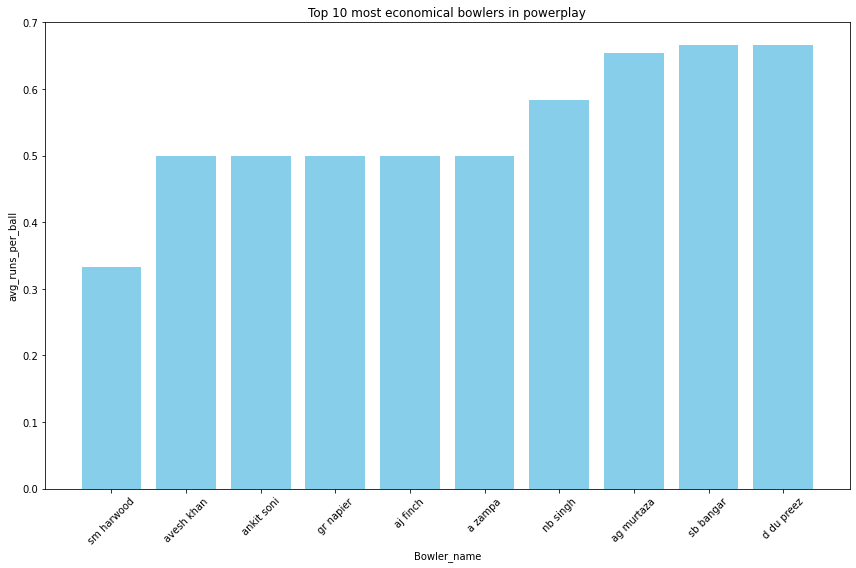

In [0]:
#Assuming that the economical_in_powerplay dataframe is available
economical_bowlers_powerplay_pd = economical_bowlers_powerplay.toPandas()

#visualizing using the matplotlib
plt.figure(figsize = (12,8))
#visualizing only top 10 players
top_10_economical_bowlers = economical_bowlers_powerplay_pd.nsmallest(10,'avg_runs_per_ball')
plt.bar(top_10_economical_bowlers['player_name'],top_10_economical_bowlers['avg_runs_per_ball'], color = 'Skyblue')
plt.xlabel('Bowler_name')
plt.ylabel('avg_runs_per_ball')
plt.title('Top 10 most economical bowlers in powerplay')
plt.xticks(rotation = 45)
plt.tight_layout()
plt.show()



In [0]:
import seaborn as sns

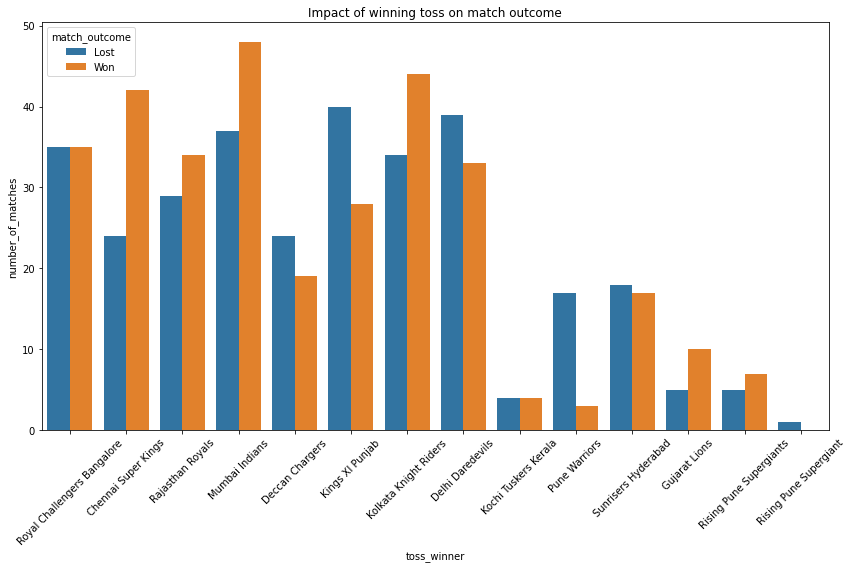

In [0]:
#Assuming that the economical_in_powerplay dataframe is available
toss_impact_pd = toss_impact_on_individual_matches.toPandas()

#visualizing using the matplotlib
plt.figure(figsize = (12,8))
#visualizing only top 10 players
sns.countplot(x = 'toss_winner', hue = 'match_outcome', data = toss_impact_pd)
plt.xlabel('toss_winner')
plt.ylabel('number_of_matches')
plt.title('Impact of winning toss on match outcome')
plt.xticks(rotation = 45)
plt.tight_layout()
plt.show()

In [0]:
#analysing the dismissal types

dismissal_types = spark.sql("""
select b.out_type, count(b.out_type) as count 
from ball_by_ball b
where out_type != 'Not Applicable'
group by b.out_type    
order by count desc                
""")

dismissal_types.show()

+--------------------+-----+
|            out_type|count|
+--------------------+-----+
|              caught| 3678|
|              bowled| 1382|
|             run out|  744|
|        Keeper Catch|  695|
|                 lbw|  455|
|             stumped|  222|
|   caught and bowled|  211|
|        retired hurt|    9|
|          hit wicket|    9|
|obstructing the f...|    1|
+--------------------+-----+



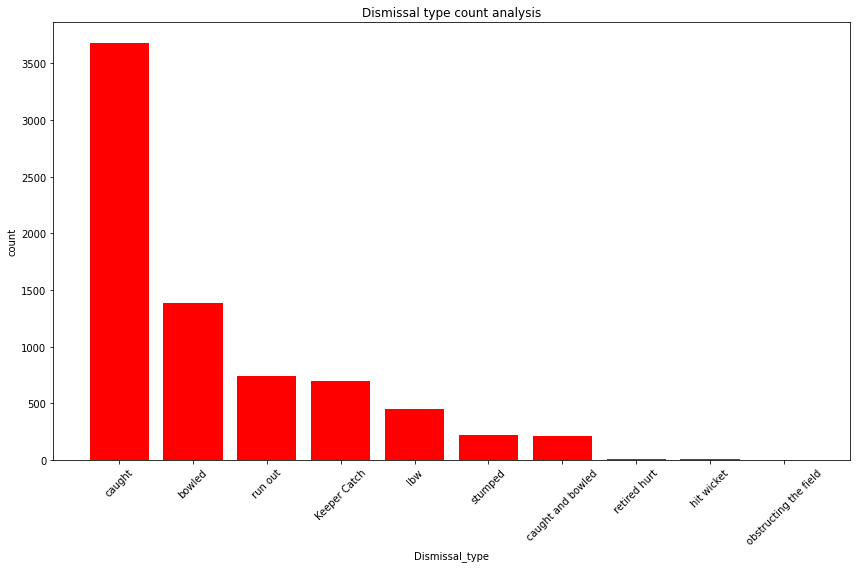

In [0]:
dismissal_types_pd = dismissal_types.toPandas()

plt.figure(figsize=(12,8))
plt.bar(dismissal_types_pd['out_type'],dismissal_types_pd['count'],color = 'red')
plt.xlabel('Dismissal_type')
plt.ylabel('count')
plt.title('Dismissal type count analysis')
plt.xticks(rotation = 45)
plt.tight_layout()
plt.show()

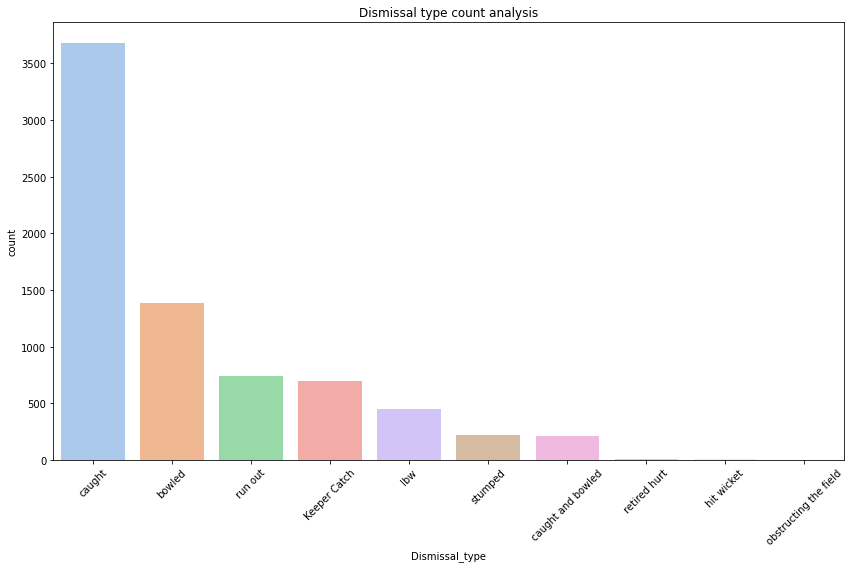

In [0]:
#creating the same visual using the seaborn package
plt.figure(figsize = (12,8))
sns.barplot(x= 'out_type',y ='count', data = dismissal_types_pd, palette = 'pastel' )
plt.xlabel('Dismissal_type')
plt.ylabel('count')
plt.title('Dismissal type count analysis')
plt.xticks(rotation = 45)
plt.tight_layout()
plt.show()